In [2]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm as cmaps
from mpl_toolkits.axes_grid1 import make_axes_locatable

dimension = "2D2V"
R = 80                   # Radius

# model = "Full"         # Full - fully kinetic PIC; Hybrid - Hybrid PIC
# step = 49800*8
# species = ["p", "e"]   # Full PIC usually have two species: p and e

model = "Hybrid"       # Full - fully kinetic PIC; Hybrid - Hybrid PIC
step = 250*14
gamma = 1           # For hybrid, an additional parameter is needed
species = ["p"]

if model == "Full":
    dat_dir = "../../Data/{model}/{dimension}/R{R:g}".format(model=model, dimension=dimension, R=R)
elif model == "Hybrid":
    dat_dir = "../../Data/{model}/{dimension}/Ma20/R{R:g}".format(model=model, dimension=dimension, R=R)
else:
    raise Exception("Unknown model [{}]".format(model))
    
dat_files = ["{}/number_density_{}_step{}.dat".format(dat_dir, s, step) for s in species]
print("Loading data from {} ...".format(dat_files))
fields = [np.genfromtxt(dat_file) for dat_file in dat_files]   #为什么需要fields=[np.] fields[0][]:ni! fields[1][]:ne!
print("Loading data completed!")

Loading data from ['../../Data/Hybrid/2D2V/Ma20/R80/number_density_p_step3500.dat'] ...
Loading data completed!


In [6]:
R = 40
dat_dir = "../../Data/{model}/{dimension}/Ma20/R{R:g}".format(model=model, dimension=dimension, R=R)
dat_files = ["{}/number_density_{}_step{}.dat".format(dat_dir, s, step) for s in species]
print("Loading data from {} ...".format(dat_files))
fields2 = [np.genfromtxt(dat_file) for dat_file in dat_files]   #为什么需要fields=[np.] fields[0][]:ni! fields[1][]:ne!
print("Loading data completed!")

Loading data from ['../../Data/Hybrid/2D2V/Ma20/R40/number_density_p_step3500.dat'] ...
Loading data completed!


In [3]:
n_screenout = 1e-6  # n = NAN if < n_screenout

ny, nx = fields[0].shape
dx = 1; nx_show = [0, 880+1]
dy = 1; ny_show = [0, 320+1]
x = dx*np.arange(nx)       #np.arange(a) 生成[0,a-1]数组
y = dy*np.arange(ny)
X, Y = np.meshgrid(x,y)    #生成坐标网格，以x,y坐标

In [50]:
fontsize_label=20
fontsize_tick=16

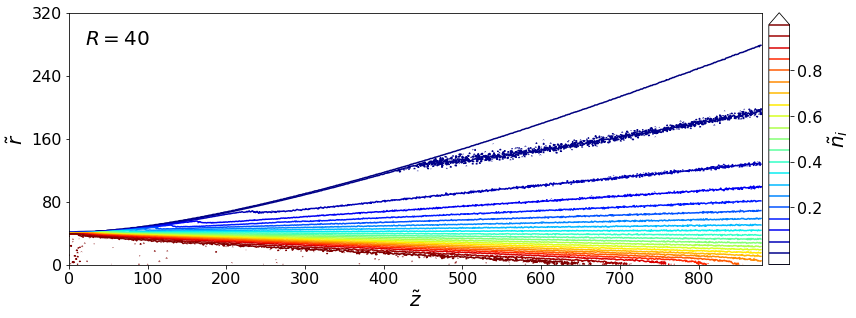

In [55]:
# ni R = 40
fig, ax = plt.subplots(figsize=(12, 8))

value_min = 0              
value_max = 1.0
value_step = 0.2

value_levels = np.zeros(22)
value_levels[0] = 1e-3
value_levels[1] = 1e-2
value_levels[2:-1] = np.arange(0.05, 0.951, 0.05)
value_levels[-1] = 0.98

cmap = plt.cm.get_cmap('jet')
cmap.set_over(cmaps.jet(255))

ch = ax.contour(X[ny_show[0]:ny_show[1], nx_show[0]:nx_show[1]],         #即 X[0:241, 0:721], 前者决定行数,
                Y[ny_show[0]:ny_show[1], nx_show[0]:nx_show[1]],         #后者决定列数，从原始X矩阵中选取前241行
                fields2[0][ny_show[0]:ny_show[1], nx_show[0]:nx_show[1]],
                value_levels, extend="max",  cmap=cmap, origin="lower")  #  color the values above(extend='max')
                                                                         #'lower': Z[0, 0] is at X=0.5, Y=0.5 in the lower left corner

) ax.set_aspect(1)                                                         #与'equal'相同，x,y有相同的缩放比例(消除白边)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)
cbar = plt.colorbar(ch, cax=cax)
cbar.set_label(label=r"$\tilde{n}_i$", fontsize=fontsize_label)
cbar.set_ticks(np.arange(value_min, value_max+value_step, value_step))
cbar.ax.tick_params(labelsize=fontsize_tick

ax.set_xticks(np.arange(nx_show[0]*dx, nx_show[-1]*dx, 100))      #设置x刻度
ax.set_yticks(np.arange(ny_show[0]*dy, ny_show[-1]*dy, 80))      #设置y刻度
ax.set_xlabel(r"$\tilde{z}$", fontsize=fontsize_label)           #横轴标题
ax.set_ylabel(r"$\tilde{r}$", fontsize=fontsize_label)           #纵轴标题
ax.tick_params(labelsize=fontsize_tick)
ax.text(20, 280, "${R}=40$", fontsize = 20)
#img_name = "Fig/ni_contour_{model}_{dimension}".format(model=model, dimension=dimension)
fig.tight_layout()
# plt.savefig(img_name+".eps", dpi=200)
# plt.savefig(img_name+".png", dpi=200)
plt.show()

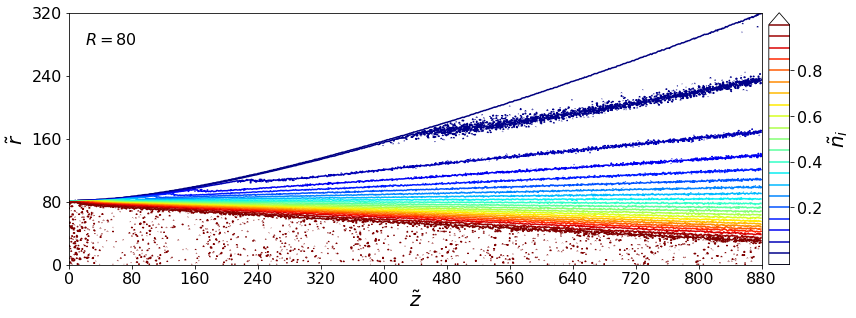

In [65]:
# ni R = 40
fig, ax = plt.subplots(figsize=(12, 8))

value_min = 0              
value_max = 1.0
value_step = 0.2

value_levels = np.zeros(22)
value_levels[0] = 1e-3
value_levels[1] = 1e-2
value_levels[2:-1] = np.arange(0.05, 0.951, 0.05)
value_levels[-1] = 0.98

cmap = plt.cm.get_cmap('jet')
cmap.set_over(cmaps.jet(255))

ch = ax.contour(X[ny_show[0]:ny_show[1], nx_show[0]:nx_show[1]],         #即 X[0:241, 0:721], 前者决定行数,
                Y[ny_show[0]:ny_show[1], nx_show[0]:nx_show[1]],         #后者决定列数，从原始X矩阵中选取前241行
                fields[0][ny_show[0]:ny_show[1], nx_show[0]:nx_show[1]],
                value_levels, extend="max",  cmap=cmap, origin="lower")  #  color the values above(extend='max')
                                                                         #'lower': Z[0, 0] is at X=0.5, Y=0.5 in the lower left corner

ax.set_aspect(1)                                                         #与'equal'相同，x,y有相同的缩放比例(消除白边)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)
cbar = plt.colorbar(ch, cax=cax)
cbar.set_label(label=r"$\tilde{n}_i$", fontsize=fontsize_label)
cbar.set_ticks(np.arange(value_min, value_max+value_step, value_step))
cbar.ax.tick_params(labelsize=fontsize_tick) 

ax.set_xticks(np.arange(nx_show[0]*dx, nx_show[-1]*dx, 80))      #设置x刻度
ax.set_yticks(np.arange(ny_show[0]*dy, ny_show[-1]*dy, 80))      #设置y刻度
ax.set_xlabel(r"$\tilde{z}$", fontsize=fontsize_label)           #横轴标题
ax.set_ylabel(r"$\tilde{r}$", fontsize=fontsize_label)           #纵轴标题
ax.tick_params(labelsize=fontsize_tick)
ax.text(20, 280, "${R}=80$", fontsize = 20)
#img_name = "Fig/ni_contour_{model}_{dimension}".format(model=model, dimension=dimension)
fig.tight_layout()
# plt.savefig(img_name+".eps", dpi=200)
# plt.savefig(img_name+".png", dpi=200)
plt.show()

In [61]:
if model == "Full":
    # ne
    fig, ax = plt.subplots(figsize=(8, 6))
    
    cmap = plt.cm.get_cmap("rainbow")
    cmap.set_over(cmaps.rainbow(255))
    
    ch = ax.contour(X[ny_show[0]:ny_show[1], nx_show[0]:nx_show[1]],
                    Y[ny_show[0]:ny_show[1], nx_show[0]:nx_show[1]],
                    fields[1][ny_show[0]:ny_show[1], nx_show[0]:nx_show[1]],
                    value_levels, extend="max",  cmap=cmap, origin="lower")

    ax.set_aspect(1)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.1)
    cbar = plt.colorbar(ch, cax=cax)
    cbar.set_label(label=r"$\tilde{n}_e$", fontsize=fontsize_label)
    cbar.set_ticks(np.arange(value_min, value_max+value_step, value_step))
    cbar.ax.tick_params(labelsize=fontsize_tick) 

    ax.set_xticks(np.arange(nx_show[0]*dx, nx_show[-1]*dx, 80))
    ax.set_yticks(np.arange(ny_show[0]*dy, ny_show[-1]*dy, 80))
    ax.set_xlabel(r"$\tilde{z}$", fontsize=fontsize_label)
    ax.set_ylabel(r"$\tilde{r}$", fontsize=fontsize_label)
    ax.tick_params(labelsize=fontsize_tick)

    #img_name = "Fig/ne_contour_{model}_{dimension}".format(model=model, dimension=dimension)
    fig.tight_layout()
    # plt.savefig(img_name+".eps", dpi=200)
    plt.savefig(img_name+".png", dpi=200)
    plt.show()
    print("****")

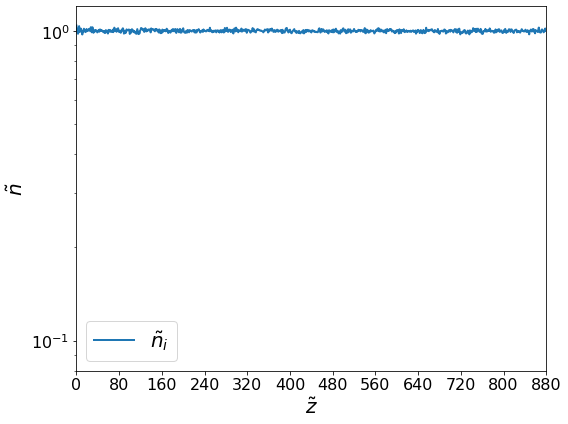

In [62]:
# ni/ne along x-axis
fig, ax = plt.subplots(figsize=(8, 6))

iy = 1
ix_show = np.arange(0, 200)

ni_1d = fields[0][iy,:]
ni_1d[ni_1d < n_screenout] = np.nan

if model == "Full":
    ne_1d = fields[1][iy,:]
    ne_1d[ne_1d < n_screenout] = np.nan

ax.semilogy(x, ni_1d, "-",  lw=2, label="$\\tilde{n}_i$")
if model == "Full":
    ax.semilogy(x, ne_1d, "--", lw=2, label="$\\tilde{n}_e$")

# ax.plot(x, ni_1d, "-",  lw=2, label="$\\tilde{n}_i$")
# if model == "Full":
#     ax.plot(x, ne_1d, "--", lw=2, label="$\\tilde{n}_e$")

ax.legend(fontsize=fontsize_label)

#ax.set_xlim([nx_show[0]*dx, nx_show[-1]*dx])
ax.set_xlim([nx_show[0]*dx, 800])
ax.set_ylim([0.8e-1, 1.2])
ax.set_xticks(np.arange(nx_show[0]*dx, nx_show[-1]*dx, 80))
# ax.set_yticks(np.arange(0, 1.2+0.2, 0.2))
ax.tick_params(labelsize=fontsize_tick)

ax.set_xlabel(r"$\tilde{z}$", fontsize=fontsize_label)
ax.set_ylabel(r"$\tilde{n}$", fontsize=fontsize_label)

img_name = "Fig/ni_ne_y{}_{dimension}".format(iy,dimension=dimension)
fig.tight_layout()                    #填充整个区域，可能不工作
# plt.savefig(img_name+".eps", dpi=200)
plt.savefig(img_name+".png", dpi=200)
plt.show()

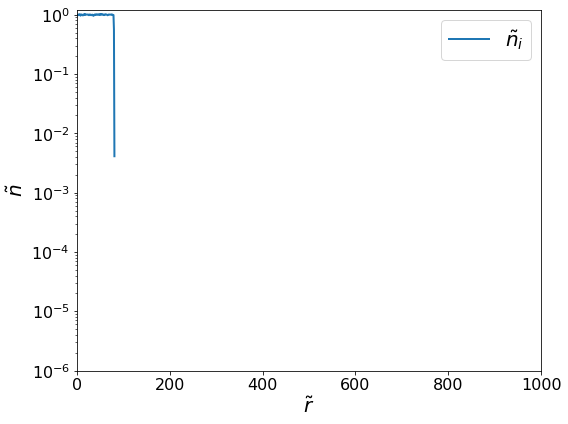

In [63]:
# ni/ne along y-axis
fig, ax = plt.subplots(figsize=(8, 6))

ix = 10    # x=10线上ni_ne的变化 
ny_show = [0, 1000]

ni_1d = fields[0][:,ix]
ni_1d[ni_1d < n_screenout] = np.nan

if model == "Full":
    ne_1d = fields[1][:,ix]
    ne_1d[ne_1d < n_screenout] = np.nan

ax.semilogy(y, ni_1d, "-",  lw=2, label="$\\tilde{n}_i$")
if model == "Full":
    ax.semilogy(y, ne_1d, "--", lw=2, label="$\\tilde{n}_e$")

ax.legend(fontsize=fontsize_label)

ax.set_xlim([ny_show[0]*dy, ny_show[-1]*dy])
ax.set_ylim([1e-6, 1.2])
ax.set_xticks(np.arange(ny_show[0]*dy, ny_show[-1]*dy+0.001, 200))
# ax.set_yticks(np.arange(0, 1.2+0.2, 0.2))
ax.tick_params(labelsize=fontsize_tick)

ax.set_xlabel(r"$\tilde{r}$", fontsize=fontsize_label)
ax.set_ylabel(r"$\tilde{n}$", fontsize=fontsize_label)

img_name = "Fig/ni_ne_x{}_{dimension}".format(ix,dimension=dimension)
fig.tight_layout()
# plt.savefig(img_name+".eps", dpi=200)
plt.savefig(img_name+".png", dpi=200)
plt.show()